In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 200
i0 = 100
H = -np.roll(np.eye(L), 1, axis=0) - np.roll(np.eye(L), -1, axis=0)
psi0 = np.zeros(L)
psi0[i0 - 1] = 1.0

In [3]:
D, U = np.linalg.eigh(H)
c = U.T @ psi0

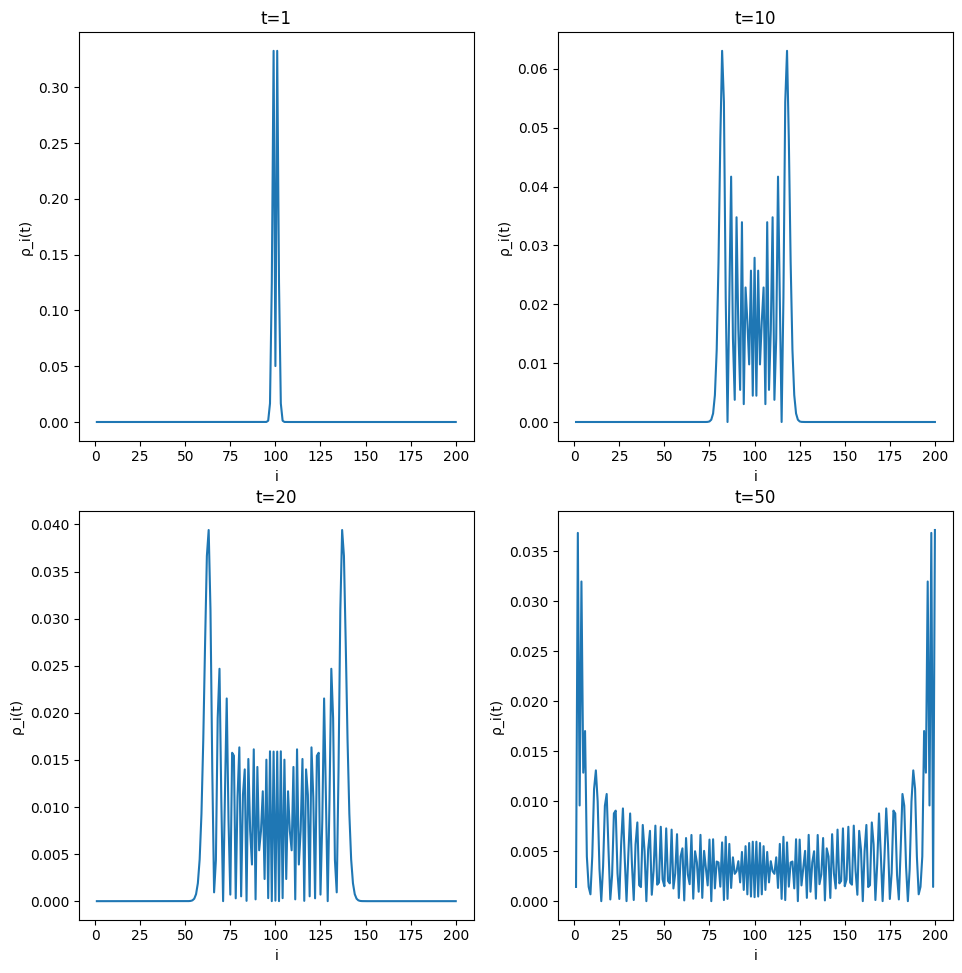

In [5]:
def psi_t(t):
    phase = np.exp(-1j * D * t)
    return U @ (phase * c)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.tight_layout(pad=3)

for i, t in enumerate([1, 10, 20, 50]):
    psi = psi_t(t)
    rho = np.abs(psi)**2
    axes[i // 2, i % 2].plot(range(1, L+1), rho)
    axes[i // 2, i % 2].set_title(f't={t}')
    axes[i // 2, i % 2].set_xlabel('i')
    axes[i // 2, i % 2].set_ylabel('ρ_i(t)')

plt.show()

### 波包宽度

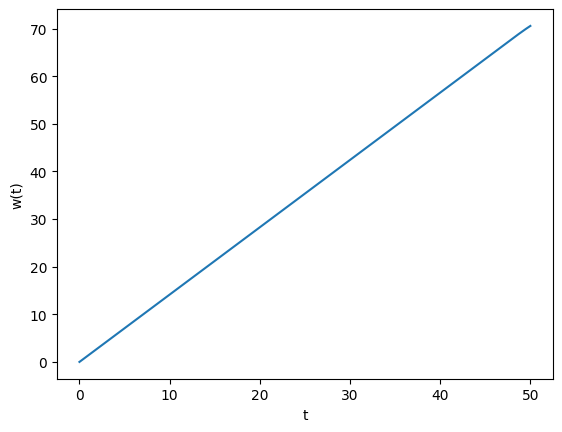

In [7]:
times = np.linspace(0, 50, 500)
w_values = []

for t in times:
    psi = psi_t(t)
    rho = np.abs(psi)**2
    i_centered = np.arange(L) - (i0 - 1)  # 转换为0-based索引
    w = np.sqrt(np.sum(rho * i_centered**2))
    w_values.append(w)

plt.plot(times, w_values)
plt.xlabel('t')
plt.ylabel('w(t)')
plt.show()

### 初始点密度

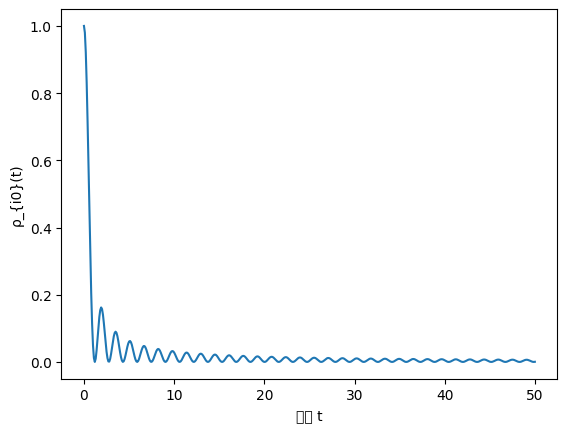

In [8]:
rho_i0 = [np.abs(psi_t(t)[i0 - 1])**2 for t in times]
plt.plot(times, rho_i0)
plt.xlabel('时间 t')
plt.ylabel('ρ_{i0}(t)')
plt.show()